<a href="https://colab.research.google.com/github/neel0086/deep_learning/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import io
import tensorflow as tf
from tensorflow import keras
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline

In [2]:
uploaded = files.upload()



Saving customer_churn.csv to customer_churn.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['customer_churn.csv']))
df.drop('customerID',axis='columns',inplace=True)
df = pd.DataFrame(df)
# pd.set_option("display.max_rows",100)
# pd.set_option('display.max_columns',100)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# REMOVING NOISE FROM THE DATA #
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [6]:
# Change to numeric data for Total Charges
df1 = df1.copy()
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

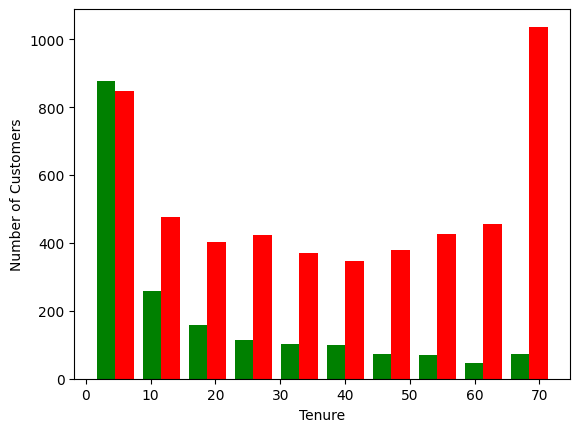

In [7]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")

plt.hist([tenure_churn_yes, tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])

(array([[ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.],
        [1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 BarContainer objects>)

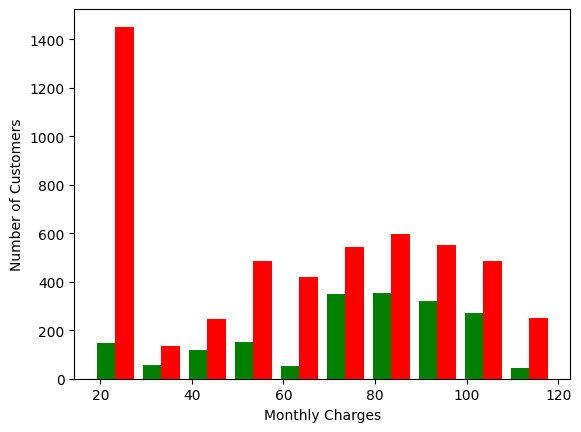

In [8]:
mc_churn_no = df1[df1.Churn == "No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")

plt.hist([mc_churn_yes, mc_churn_no],color=['green','red'],label=['MonthlyCharges=Yes','MonthlyCharges=No'])

In [9]:
# FETCHING UNIQUE DATA to analysis it and clean if needed
def print_unique_col_values(dff):
  for col in dff:
    if df[col].dtypes == 'object':
      print(f'{col} : {dff[col].unique()}')

In [10]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [11]:
#Data Cleanining
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)
print_unique_col_values(df1)


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [12]:
col_name = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in col_name:
  df1[col].replace({"Yes":1,"No":0},inplace=True)

df1['gender'].replace({"Female":1,"Male":0},inplace=True)


In [13]:
print_unique_col_values(df1)

gender : [1 0]
Partner : [1 0]
Dependents : [0 1]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [14]:
# One-Hot Encoding / Bitmap Index
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [15]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [16]:
X = df2.drop('Churn',axis='columns')
Y = df2["Churn"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 5)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5625, 26) (5625,)
(1407, 26) (1407,)


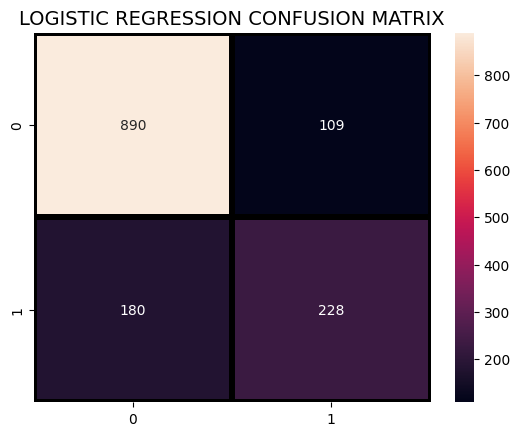

In [18]:
#  LOGISTIC REGRESSION MODEL
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
accuracy = lr_model.score(X_test,Y_test)
accuracy

lr_predict = lr_model.predict(X_test)
sns.heatmap(confusion_matrix(Y_test, lr_predict),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

0.7121535181236673


<Axes: >

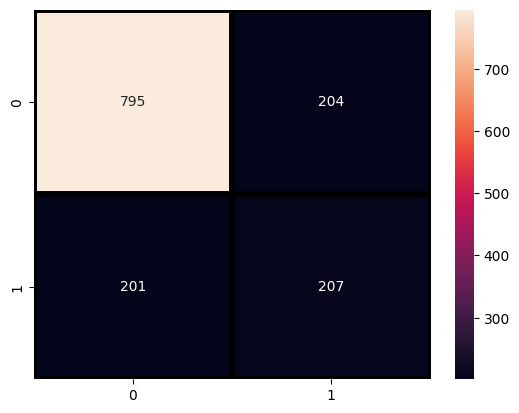

In [24]:
# DECISION TREE MODEL
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

accuracy = dt_model.score(X_test, Y_test)
dt_predict = dt_model.predict(X_test)
print(accuracy)
sns.heatmap(confusion_matrix(Y_test, dt_predict),annot=True,fmt = "d",linecolor="k",linewidths=3)

0.7761194029850746


<Axes: >

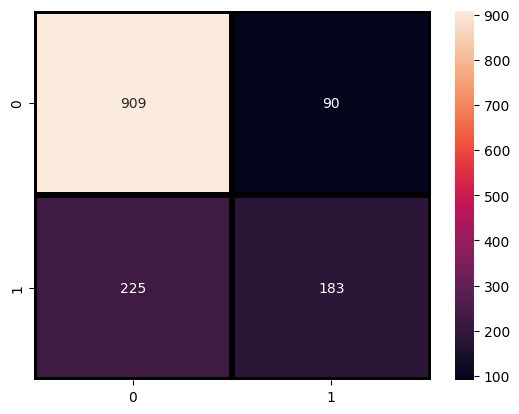

In [33]:
#RANDOM FOREST CLASSIFIER
rf_model = RandomForestClassifier(n_estimators = 1000, oob_score = True,
                                  n_jobs = -1, random_state = 65, max_leaf_nodes = 35)

rf_model.fit(X_train, Y_train)
accuracy = rf_model.score(X_test, Y_test)
rf_predict = rf_model.predict(X_test)
print(accuracy)
sns.heatmap(confusion_matrix(Y_test, rf_predict), annot=True,fmt = "d",linecolor="k",linewidths=3)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation="relu"),          # As 26 columns are there so 26 features and hence 26 neurons
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

model.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics=['accuracy']

)
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
176/176 [==============================] - 1s 2ms/step - loss: 0.5324 - accuracy: 0.7084
Epoch 2/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.7860
Epoch 3/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.7980
Epoch 4/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8021
Epoch 5/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8007
Epoch 6/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8057
Epoch 7/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8036
Epoch 8/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8078
Epoch 9/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8084
Epoch 10/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4059 - accura

In [21]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 981us/step - loss: 0.6320 - accuracy: 0.7662


[0.6320189833641052, 0.7661691308021545]